In [ ]:
%matplotlib inline

# RandomGridShuffle

This transformation divides the image into a grid and then permutes these grid cells based on a random mapping.

It could be useful when only micro features are important for the model, and memorizing the global structure could be harmful. 

For example: 
- Identifying the type of cell phone used to take a picture based on micro artifacts generated by phone post-processing algorithms, rather than the semantic features of the photo. See more at https://ieeexplore.ieee.org/abstract/document/8622031
- Identifying stress, glucose, hydration levels based on skin images.

In [ ]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/albumentations_examples/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import json

In [ ]:
KEYPOINT_COLOR = (0, 255, 0)

In [ ]:
def vis_keypoints(image, keypoints, color=KEYPOINT_COLOR, diameter=3):
    image = image.copy()
    for x, y in keypoints:
        cv2.circle(image, (int(x), int(y)), diameter, color, -1)
    return image

In [ ]:
def visualize(image, mask, keypoints):
    # Create a copy of the image to draw on
    img = image.copy()

    # Apply keypoints if provided
    if keypoints:
        img = vis_keypoints(img, keypoints)

    # Setup plot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Show the image with annotations
    ax[0].imshow(img)
    ax[0].axis("off")

    # Show the mask
    ax[1].imshow(mask, cmap="gray")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
with open("../data/road_labels.json") as f:
    labels = json.load(f)

In [ ]:
keypoints = labels["keypoints"]

In [ ]:
image = cv2.imread("../data/road.jpeg", cv2.IMREAD_COLOR_RGB)

mask = cv2.imread("../data/road.png", 0)

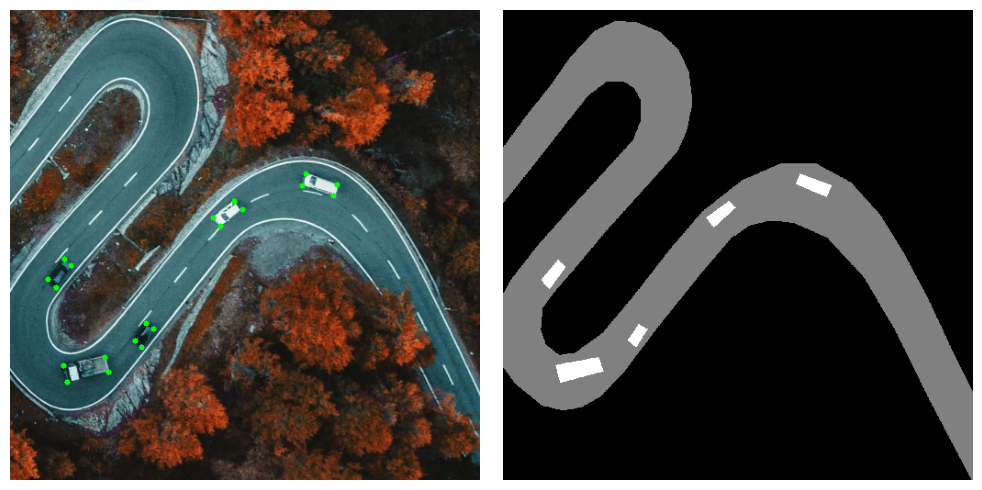

In [ ]:
visualize(image, mask, keypoints)

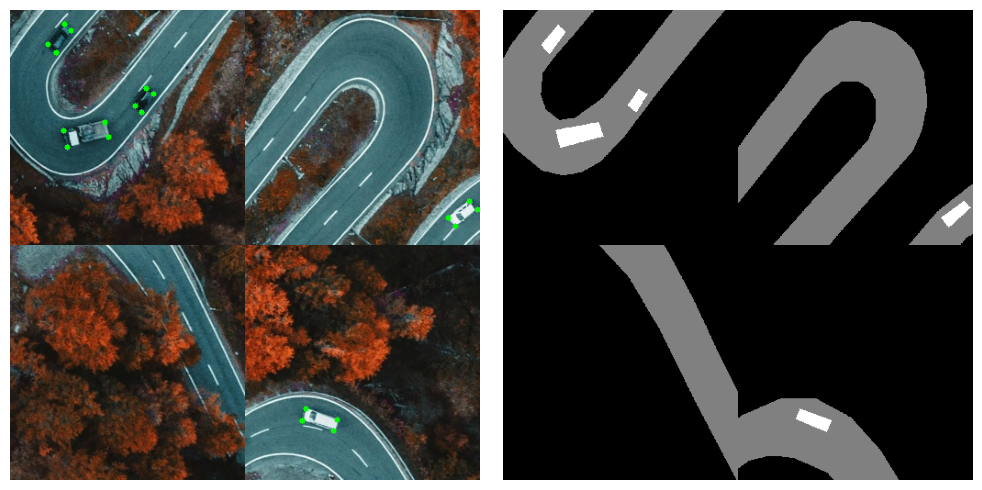

In [ ]:
transform = A.Compose([A.RandomGridShuffle(grid=(2, 2), p=1)], keypoint_params=A.KeypointParams(format="xy"))
transformed = transform(image=image, keypoints=keypoints, mask=mask)
visualize(transformed["image"], transformed["mask"], transformed["keypoints"])

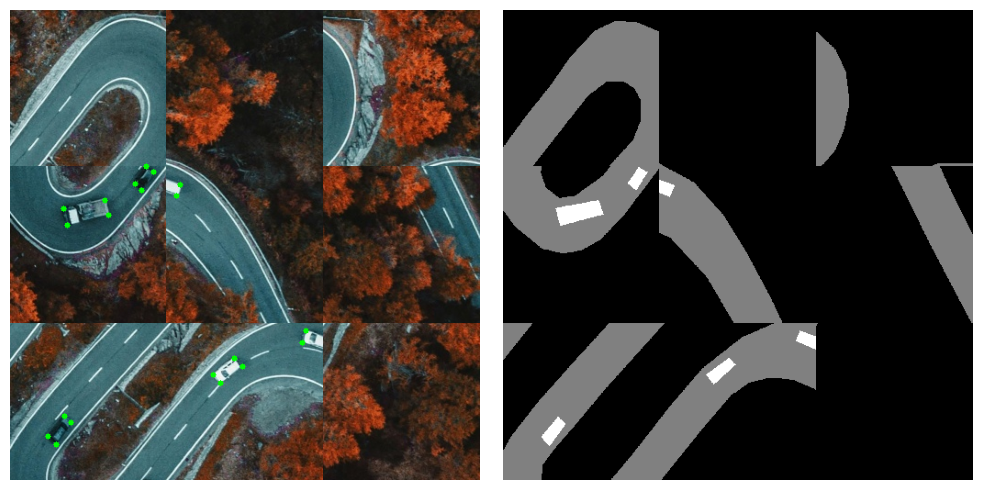

In [ ]:
transform = A.Compose(
    [A.RandomGridShuffle(grid=(3, 3), p=1)],
    keypoint_params=A.KeypointParams(format="xy"),
    seed=137,
    strict=True,
)
transformed = transform(image=image, keypoints=keypoints, mask=mask)
visualize(transformed["image"], transformed["mask"], transformed["keypoints"])

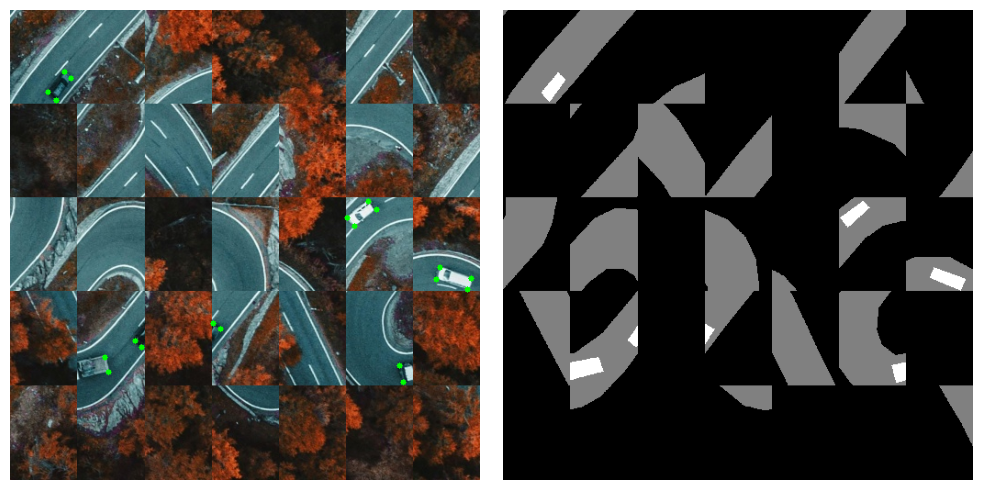

In [ ]:
transform = A.Compose(
    [A.RandomGridShuffle(grid=(5, 7), p=1)],
    keypoint_params=A.KeypointParams(format="xy"),
    seed=137,
    strict=True,
)
transformed = transform(image=image, keypoints=keypoints, mask=mask)
visualize(transformed["image"], transformed["mask"], transformed["keypoints"])